# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [5]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [7]:
round(spaceship.isnull().sum()/len(spaceship)*100,2)

PassengerId     0.00
HomePlanet      2.31
CryoSleep       2.50
Cabin           2.29
Destination     2.09
Age             2.06
VIP             2.34
RoomService     2.08
FoodCourt       2.11
ShoppingMall    2.39
Spa             2.11
VRDeck          2.16
Name            2.30
Transported     0.00
dtype: float64

In [8]:
spaceship = spaceship.dropna()

In [9]:
spaceship['Cabin'] = spaceship['Cabin'].str[0]
valid_cabins = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
spaceship['Cabin'] = spaceship['Cabin'].apply(lambda x: x if x in valid_cabins else 'Unknown')

In [10]:
spaceship = spaceship.drop(columns=["PassengerId", "Name"])

In [11]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
new_spaceship = pd.get_dummies(spaceship, columns=categorical_cols, drop_first=False, dtype=int)
columns_to_drop = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'] 
new_spaceship = new_spaceship.drop(columns=columns_to_drop, errors='ignore')
display(new_spaceship.head())

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,1,0,0,...,0,0,1,0,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,0,0,...,0,0,1,0,0,0,0,1,1,0


In [12]:
new_spaceship.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6606 non-null   float64
 1   RoomService                6606 non-null   float64
 2   FoodCourt                  6606 non-null   float64
 3   ShoppingMall               6606 non-null   float64
 4   Spa                        6606 non-null   float64
 5   VRDeck                     6606 non-null   float64
 6   Transported                6606 non-null   bool   
 7   HomePlanet_Earth           6606 non-null   int64  
 8   HomePlanet_Europa          6606 non-null   int64  
 9   HomePlanet_Mars            6606 non-null   int64  
 10  CryoSleep_False            6606 non-null   int64  
 11  CryoSleep_True             6606 non-null   int64  
 12  Cabin_A                    6606 non-null   int64  
 13  Cabin_B                    6606 non-null   int64  
 1

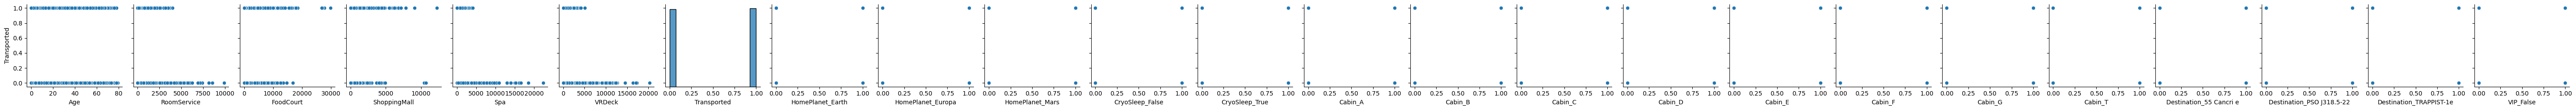

In [13]:
sns.pairplot(new_spaceship, y_vars=['Transported'], x_vars=new_spaceship.columns[:-1], kind='scatter')

**Perform Train Test Split**

In [15]:
features = new_spaceship.drop(columns = ["Transported"])
target = new_spaceship["Transported"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [17]:
normalizer = MinMaxScaler()
normalizer = normalizer.fit(X_train)

In [18]:
X_train_normalized = normalizer.transform(X_train)
X_train_normalized = pd.DataFrame(X_train_normalized, columns = X_train.columns)
X_train_normalized.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.405063,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.050633,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.379747,0.00000,0.007916,0.000000,0.051276,0.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.215190,0.00131,0.000000,0.046111,0.016378,0.000049,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.329114,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [19]:
X_test_normalized = normalizer.transform(X_test)
X_test_normalized = pd.DataFrame(X_test_normalized, columns = X_test.columns)
X_test_normalized.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.632911,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.227848,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.189873,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.658228,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.784810,0.0,0.054775,0.0,0.07774,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

In [22]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [23]:
bagging_reg.fit(X_train_normalized, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [24]:
pred = bagging_reg.predict(X_test_normalized)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(y_test, pred))
print("R2 score", bagging_reg.score(X_test_normalized, y_test))

MAE 0.27788810788613333
RMSE 0.37781182225513626
R2 score 0.4290329078570133


In [25]:
pred = bagging_reg.predict(X_train_normalized)

print("MAE", mean_absolute_error(pred, y_train))
print("RMSE", root_mean_squared_error(y_train, pred))
print("R2 score", bagging_reg.score(X_train_normalized, y_train))

MAE 0.23563863444056052
RMSE 0.3193957694367907
R2 score 0.5919116945997441


- Random Forests

In [27]:
forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)

In [28]:
forest.fit(X_train_normalized, y_train)

RandomForestRegressor(max_depth=20)

In [29]:
pred = forest.predict(X_test_normalized)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(y_test, pred))
print("R2 score", forest.score(X_test_normalized, y_test))

MAE 0.2692227717205994
RMSE 0.3836917653980675
R2 score 0.4111225166628574


In [30]:
pred = forest.predict(X_train_normalized)

print("MAE", mean_absolute_error(pred, y_train))
print("RMSE", root_mean_squared_error(y_train, pred))
print("R2 score", forest.score(X_train_normalized, y_train))

MAE 0.14757678292835566
RMSE 0.23096380857192655
R2 score 0.7866052672822473


- Gradient Boosting

In [32]:
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

In [33]:
gb_reg.fit(X_train_normalized, y_train)

GradientBoostingRegressor(max_depth=20)

In [34]:
pred = gb_reg.predict(X_test_normalized)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(y_test, pred))
print("R2 score", gb_reg.score(X_test_normalized, y_test))

MAE 0.2625730169336117
RMSE 0.42422748253196224
R2 score 0.2801241722583747


In [35]:
pred = gb_reg.predict(X_train_normalized)

print("MAE", mean_absolute_error(pred, y_train))
print("RMSE", root_mean_squared_error(y_train, pred))
print("R2 score", gb_reg.score(X_train_normalized, y_train))

MAE 0.0745297304028436
RMSE 0.19296250573071677
R2 score 0.8510495942078677


- Adaptive Boosting

In [37]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [38]:
ada_reg.fit(X_train_normalized, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [39]:
pred = ada_reg.predict(X_test_normalized)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(y_test, pred))
print("R2 score", ada_reg.score(X_test_normalized, y_test))

MAE 0.24984680908524864
RMSE 0.43149705204040967
R2 score 0.2552411763217439


In [40]:
pred = ada_reg.predict(X_train_normalized)

print("MAE", mean_absolute_error(pred, y_train))
print("RMSE", root_mean_squared_error(y_train, pred))
print("R2 score", ada_reg.score(X_train_normalized, y_train))

MAE 0.10663598433568587
RMSE 0.2278982297607285
R2 score 0.7922324426021318


Which model is the best and why?

Bagging and pasting is the best method with not only the highest R2, but also the lowest level of overfitting.